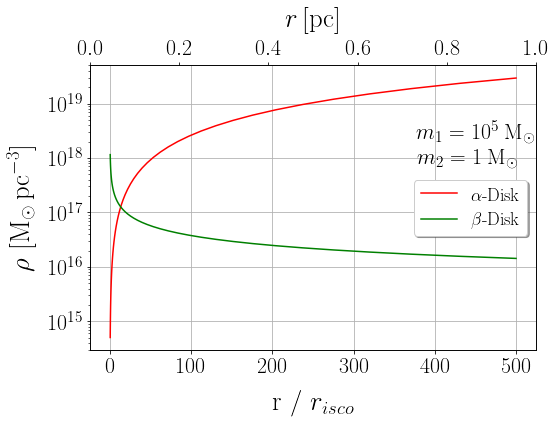

In [60]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma

from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 
    
m1 = 1e5 * c.solar_mass_to_pc
m2 = 1. *  c.solar_mass_to_pc
D = 0
sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)

alpha = 0.1
f_edd = 0.1
eps = 0.1
alphaDisk = halo.AlphaDisk(m1, alpha, f_edd, eps)
betaDisk = halo.BetaDisk(m1, alpha, f_edd, eps)

sp_b_alpha = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = alphaDisk, D=D)
sp_b_beta = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = betaDisk, D=D)





plt.figure(figsize=(8, 7 * 6./8.))
r_grid = np.geomspace(2*m1, 500*sp_0.r_isco())
ax_risco = plt.gca()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


ax_pc = ax_risco.twiny()
ax_risco.plot(r_grid/sp_0.r_isco(), alphaDisk.density(r_grid)/c.solar_mass_to_pc, 'r')
ax_risco.plot(r_grid/sp_0.r_isco(), betaDisk.density(r_grid)/c.solar_mass_to_pc, 'g')

ax_risco.text(450, 3e18, "$m_{1} = 10^{5} \: \mathrm{M_{\odot}}$", size = 22,
       ha="center", va="center")
ax_risco.text(440, 1e18, r"$m_{2} = 1 \: \mathrm{M_{\odot}}$", size = 22,
         ha="center", va="center")


ax_risco.set_yscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$",  fontsize = 27, labelpad = 12)
ax_risco.set_ylabel(r"$\rho\,\, [\mathrm{M_{\odot}\,pc^{-3}}] $", fontsize = 27, labelpad = 12)
ax_pc.set_xlabel("$r\, \mathrm{[pc]}$", fontsize = 27, labelpad = 12)
ax_risco.grid()
ax_risco.legend([r'$\alpha$-Disk', r'$\beta$-Disk'], 
           prop = {'size':18}, loc = 'center right', shadow = True, facecolor = 'white', fontsize = 65)

plt.xticks(fontsize = 22)
plt.savefig("rho_disk.pdf", bbox_inches="tight")
plt.show()

In [ ]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 6))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                 'r')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                                                'r--')

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 29, labelpad = 12)
ax_risco.legend(['GW loss', 'Ostriker(DF)', 'Type-I'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'$\alpha$-disk, circular orbit ($e = 0$)', fontsize = 25, pad = 10)
plt.savefig("α_energyloss.pdf", bbox_inches="tight")
plt.show()

In [ ]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 6))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                                'g')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                            'g--')



plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 29, labelpad = 12)
ax_risco.legend(['GW loss', 'Ostriker(DF)', 'Type-I'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'$\beta$-disk, circular orbit ($e = 0$)', fontsize = 25, pad = 10)
plt.savefig("β_energyloss.pdf", bbox_inches="tight")
plt.show()

/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime


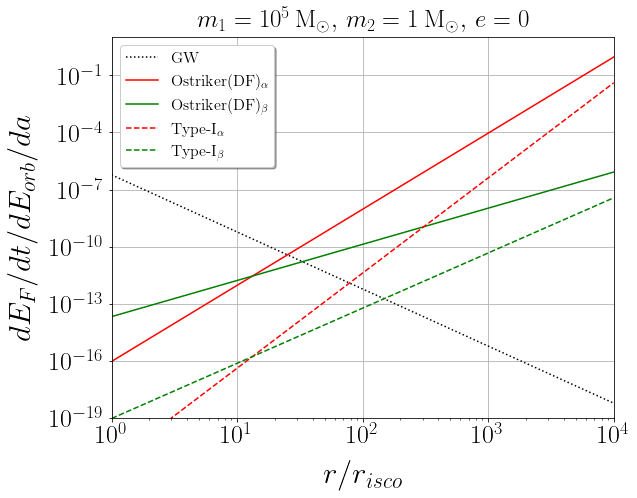

In [63]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 7))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')


ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                 'r')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                                'g')


ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                                               'r--')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_beta, r), 'g--')
 
                
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 31, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 31, labelpad = 12)
ax_risco.legend(['GW', r'Ostriker(DF)$_{\alpha}$', r'Ostriker(DF)$_{\beta}$', r'Type-I$_{\alpha}$', r'Type-I$_{\beta}$'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e = 0$', fontsize = 25, pad = 10)
plt.savefig("αβ_energyloss.pdf", bbox_inches="tight")
plt.show()

Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, DynamicalFrictionLoss=False
A termination event occurred.
 -> Evolution took 0.2345s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWar

A termination event occurred.
 -> Evolution took 0.2445s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2002s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:566: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:551: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:507: RuntimeWarning: invalid value encountered in double_scalars
  * (self.M / 1e6 / c.solar_mass_to_pc)**(1./5.) * (r / 10./self.M)**(-3./5.))


A termination event occurred.
 -> Evolution took 0.1867s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1821s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


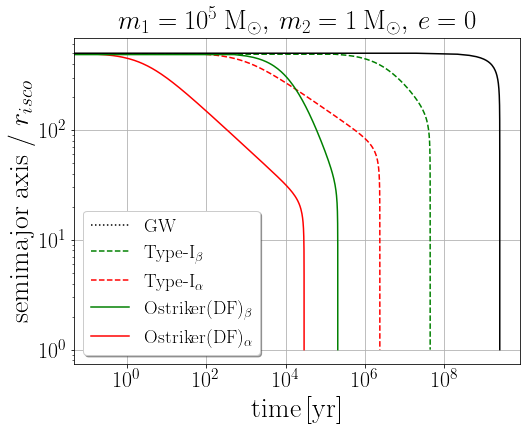

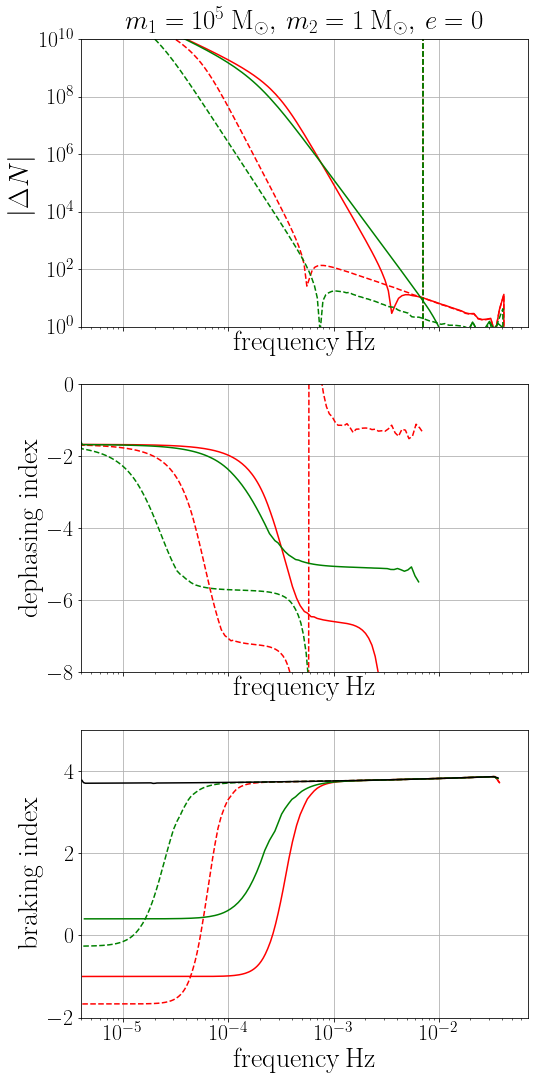

In [64]:
colors = {"alpha":'r', "beta":'g', "dm":'b', 'vac':'k'}


def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-4, n_b_min=0.):
    figF.subplots_adjust(hspace = 0.2, wspace = 0)
    
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 28)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 28)
    
   
    if not axes_a is None:
        for ax in axes_a:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('time$\, \mathrm{[yr]}$ ', fontsize = 28)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 28)

    explanatory_lines = [mpl.lines.Line2D([0], [0], color = 'k', linestyle = ':'), 
                          mpl.lines.Line2D([0], [0], color = 'g', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'r', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'g'),
                          mpl.lines.Line2D([0], [0], color = 'r')]
    axes_a[-1].legend(explanatory_lines, 
                      ['GW',  r'Type-I$_{\beta}$', r'Type-I$_{\alpha}$', r'Ostriker(DF)$_{\beta}$',r'Ostriker(DF)$_{\alpha}$',
                                         ], 
                               loc = 'lower left', prop = {'size':19}, shadow = True, facecolor = 'white', fontsize = 72)
    
    
    #axesF[0,0].set_ylabel('characteristic strain')
    axesF[0][0].set_ylabel(r'$|\Delta N|$', fontsize = 28)
    axesF[0][1].set_ylabel(r'dephasing index', fontsize = 28)
    axesF[0][2].set_ylabel(r'braking index', fontsize = 28)
    
    axesF[0][0].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 28)
    axesF[0][1].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 28)
    axesF[0][2].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 28)
    
    axesF[0][0].set_xlim(left =  f_min)
    axesF[0][0].set_ylim(bottom = 1., top = 1e10)
    axesF[0][2].set_ylim(bottom = n_b_min, top =  5)
    axesF[0][1].set_ylim(bottom = -8, top = 0)

    for ax in axesF[0]:
        ax.tick_params(axis = 'y', labelsize = 22)
        ax.tick_params(axis = 'x', labelsize = 22)
        ax.grid()



        
        
a0 = 500 * sp_0.r_isco()
e0 = 0

ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, opt = opt_0)
ev_alpha_gas1 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas1)
ev_alpha_gas2 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas2)
ev_beta_gas1  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas1)
ev_beta_gas2  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas2)


fig_ae, axes_ae = plt.subplots(1, 1, figsize = (8,6))
#fig_ae, axes_ae = plt.subplots(2, 1, figsize=(8,12))
fig_gw, axes_gw = plt.subplots(3,1, figsize = (8,18), sharex = 'all', sharey = 'row')


# accretion disks
l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1, ax_a=axes_ae, ax_n=axes_gw[2], label='Ostriker', color=colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')

l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_a=axes_ae, ax_n=axes_gw[2], label='Type I', linestyle='--', color=colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_a=axes_ae, ax_n=axes_gw[2], label='Ostriker', color=colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_a=axes_ae, ax_n=axes_gw[2], label='Type I', linestyle='--', color=colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')


# vacuum
l = plot_utils.plotEvolution(sp_0, ev_0, ax_a=axes_ae, ax_n=axes_gw[2], label='GW', color=colors["vac"])


preparePlots(fig_gw, [axes_gw], axes_a=[axes_ae], f_min=4e-6, n_b_min=-2)
axes_ae.set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e = 0$', fontsize = 27, pad = 10)
axes_gw[0].set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e = 0$', fontsize = 27, pad = 10)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

fig_ae.savefig("circular_disk.pdf", bbox_inches="tight")
fig_gw.savefig("circular_gwSignal_disk.pdf", bbox_inches="tight")
plt.show()

Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, DynamicalFrictionLoss=False
A termination event occurred.
 -> Evolution took 5.0870s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 6.7754s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)


A termination event occurred.
 -> Evolution took 4.0104s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:566: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:551: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:507: RuntimeWarning: invalid value encountered in double_scalars
  * (self.M / 1e6 / c.solar_mass_to_pc)**(1./5.) * (r / 10./self.M)**(-3./5.))


A termination event occurred.
 -> Evolution took 5.0323s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.5511s


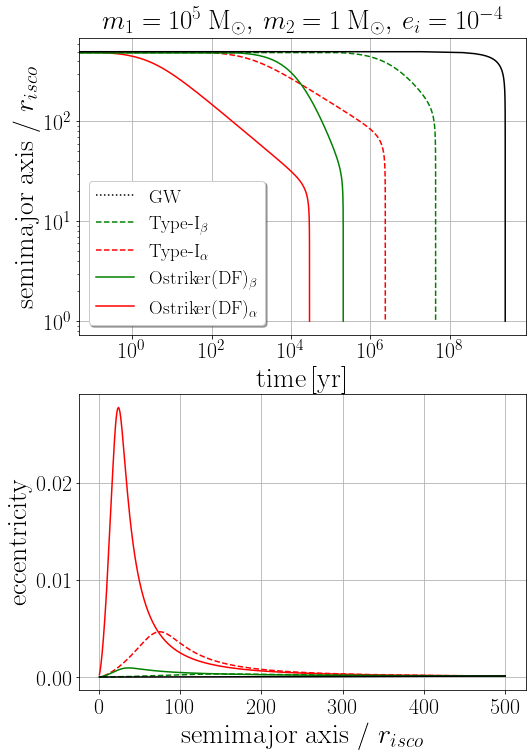

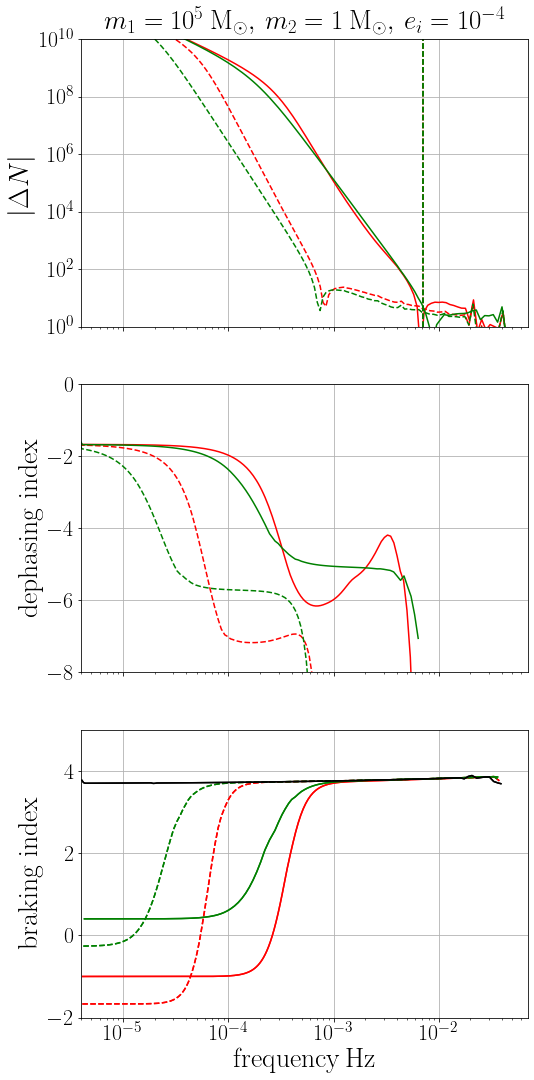

In [65]:
colors = {"alpha":'r', "beta":'g', "dm":'b', 'vac':'k'}


def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-4, n_b_min=0.):
    figF.subplots_adjust(hspace = 0.2, wspace = 0)
    
    if not axes_ae is None:
        for ax in [axes_T[1],]:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 28)
            ax.grid()
        axes_T[1].set_ylabel('eccentricity', fontsize = 28)

    
    if not axes_a is None:
        for ax in [axes_T[0],]:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('time$\, \mathrm{[yr]}$ ', fontsize = 28)
            ax.grid()
        axes_T[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 28)

    explanatory_lines = [mpl.lines.Line2D([0], [0], color = 'k', linestyle = ':'), 
                          mpl.lines.Line2D([0], [0], color = 'g', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'r', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'g'),
                          mpl.lines.Line2D([0], [0], color = 'r')]
    axes_T[0].legend(explanatory_lines, 
                      ['GW',  r'Type-I$_{\beta}$', r'Type-I$_{\alpha}$', r'Ostriker(DF)$_{\beta}$',r'Ostriker(DF)$_{\alpha}$',
                                         ], 
                    loc = 'lower left', prop = {'size':19}, shadow = True, facecolor = 'white', fontsize = 72)
    
    
    
    #axesF[0,0].set_ylabel('characteristic strain')
    axesF[0][0].set_ylabel(r'$|\Delta N|$', fontsize = 28)
    axesF[0][1].set_ylabel(r'dephasing index', fontsize = 28)
    axesF[0][2].set_ylabel(r'braking index', fontsize = 28)
    
    axesF[0][-1].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 28)
    
    axesF[0][0].set_xlim(left =  f_min)
    axesF[0][0].set_ylim(bottom = 1., top = 1e10)
    axesF[0][2].set_ylim(bottom = n_b_min, top =  5)
    axesF[0][1].set_ylim(bottom = -8, top = 0)

    for ax in axesF[0]:
        ax.tick_params(axis = 'y', labelsize = 22)
        ax.tick_params(axis = 'x', labelsize = 22)
        ax.grid()




a0 = 500 * sp_0.r_isco()
e0 = 1e-4
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, opt = opt_0)
ev_alpha_gas1 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas1)
ev_alpha_gas2 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas2)
ev_beta_gas1  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas1)
ev_beta_gas2  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas2)



        
#fig_ae, axes_ae = plt.subplots(1, 1, figsize=(8,6))
fig_ae, axes_T = plt.subplots(2, 1, figsize = (8,12))
fig_gw, axes_gw = plt.subplots(3, 1, figsize =  (8,18), sharex = 'all', sharey = 'row')


# accretion disks
l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1,  ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Ostriker', color = colors["alpha"])
plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1,  ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Ostriker', color = colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')


l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["alpha"])
plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')


l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Ostriker', color = colors["beta"])
plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Ostriker', color = colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')


l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["beta"])
plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')



# vacuum
l = plot_utils.plotEvolution(sp_0, ev_0, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'GW', color = colors["vac"])
plot_utils.plotEvolution(sp_0, ev_0, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'GW', color = colors["vac"])


preparePlots(fig_gw, [axes_gw], axes_ae = axes_T[1],  axes_a = axes_T[0], f_min = 4e-6, n_b_min = -2)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


axes_T[0].set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 10^{-4}$', fontsize = 27, pad = 10)
axes_gw[0].set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 10^{-4}$', fontsize = 27, pad = 10)


fig_ae.savefig("eccentric_disk.pdf", bbox_inches="tight")
fig_gw.savefig("eccentric_gwSignal_disk.pdf", bbox_inches="tight")
plt.show()

In [ ]:
#accretion disk + DM spike

In [66]:
colors = {"alpha":'r', "beta":'g', "dm":'b', 'vac':'k'}

def makeDynamicSpike(sp_stat):
    extPotential = lambda r:sp_stat.m1/r
    r_grid = np.geomspace(1e-1*sp_stat.r_isco(), 1e8*sp_stat.r_isco(), 100)
    Eps_grid = np.geomspace(extPotential(r_grid[-1]), extPotential(r_grid[0]), 500)
    dynSpike = halo.DynamicSS.FromSpike(Eps_grid, sp_stat, sp_stat.halo)
    sp_dyn = ms.SystemProp(sp_stat.m1, sp_stat.m2, dynSpike, sp_stat.D)
    return sp_dyn

# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm = [(sp_dm, {"label":"DM spike", "color":colors["dm"]}) ]


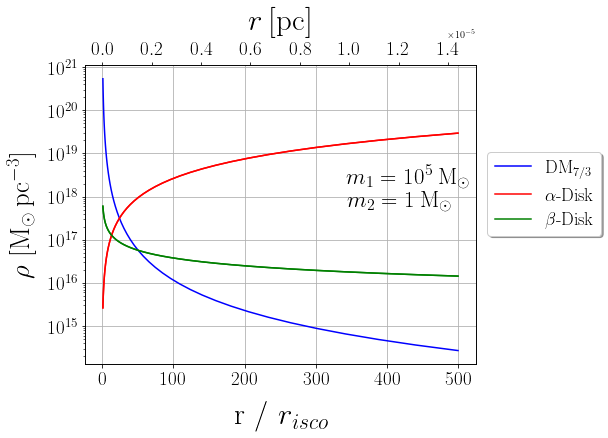

In [75]:
plt.figure(figsize=(7, 5.5))
ax_risco = plt.gca()
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
ax_pc = ax_risco.twiny()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())



for sp, kwargs in sps_dm:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), sp.halo.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    #ax_pc.plot(r_grid, sp.halo.density(r_grid)/ms.solar_mass_to_pc, color=l.get_c())

    
    
for disk, kwargs in [(alphaDisk, {"label":"$\\alpha$-disk", "color":colors["alpha"]}), (betaDisk, {"label":"$\\beta$-disk", "color":colors["beta"]})]:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), disk.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    ax_pc.plot(r_grid, disk.density(r_grid)/c.solar_mass_to_pc, color=l.get_c())

ax_risco.text(430, 3e18, "$m_{1} = 10^{5} \: \mathrm{M_{\odot}}$", size = 23,
       ha="center", va="center")
ax_risco.text(417, 8e17, r"$m_{2} = 1 \: \mathrm{M_{\odot}}$", size = 23,
         ha="center", va="center")

    
ax_risco.set_yscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$",  fontsize = 31, labelpad = 12)
ax_risco.set_ylabel(r"$\rho\,\, [\mathrm{M_{\odot}\,pc^{-3}}] $", fontsize = 27, labelpad = 12)
ax_pc.set_xlabel("$r\, \mathrm{[pc]}$", fontsize = 31, labelpad = 12)
ax_risco.grid()
ax_risco.legend(['DM$_{7/3}$', r'$\alpha$-Disk', r'$\beta$-Disk'] , 
           prop = {'size':18}, loc = (1.03, 0.43), shadow = True, facecolor = 'white', fontsize = 65)

plt.xticks(fontsize = 19)
plt.savefig("rho_dm.pdf", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(7, 5.5))
ax_risco = plt.gca()
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
ax_pc = ax_risco.twiny()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())


## Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm = [(sp_dm, {"label":"DM spike", "color":"m"}) ]
for sp, kwargs in sps_dm:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), sp.halo.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    #ax_pc.plot(r_grid, sp.halo.density(r_grid)/ms.solar_mass_to_pc, color=l.get_c())


    
    
for disk, kwargs in [(alphaDisk, {"label":"$\\alpha$-disk", "color":colors["alpha"]}), (betaDisk, {"label":"$\\beta$-disk", "color":colors["beta"]})]:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), disk.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    ax_pc.plot(r_grid, disk.density(r_grid)/c.solar_mass_to_pc, color=l.get_c())


    
ax_risco.set_yscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$",  fontsize = 27, labelpad = 12)
ax_risco.set_ylabel(r"$\rho\,\, [\mathrm{M_{\odot}\,pc^{-3}}] $", fontsize = 27, labelpad = 12)
ax_pc.set_xlabel("$r\, \mathrm{[pc]}$", fontsize = 27, labelpad = 12)
ax_risco.grid()
ax_risco.legend(['DM$_{9/4}$', r'$\alpha$-Disk', r'$\beta$-Disk'] , 
           prop = {'size':18}, loc = (1.03, 0.43), shadow = True, facecolor = 'white', fontsize = 65)

plt.xticks(fontsize = 19)
plt.savefig("rho_dm.pdf", bbox_inches="tight")

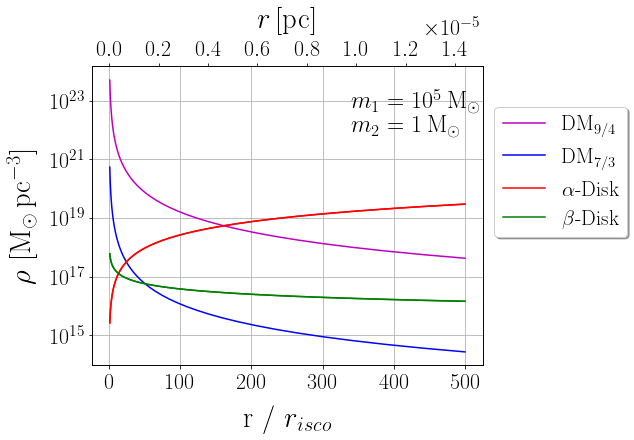

In [81]:
plt.figure(figsize=(7, 5.5))
ax_risco = plt.gca()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
ax_pc = ax_risco.twiny()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())


## Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm = [(sp_dm, {"label":"DM spike2", "color":"m"}) ]
for sp, kwargs in sps_dm:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), sp.halo.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    #ax_pc.plot(r_grid, sp.halo.density(r_grid)/ms.solar_mass_to_pc, color=l.get_c())


    
    
# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm = [(sp_dm, {"label":"DM spike1", "color":colors["dm"]}) ]
for sp, kwargs in sps_dm:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), sp.halo.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    #ax_pc.plot(r_grid, sp.halo.density(r_grid)/ms.solar_mass_to_pc, color=l.get_c())




for disk, kwargs in [(alphaDisk, {"label":"$\\alpha$-disk", "color":colors["alpha"]}), (betaDisk, {"label":"$\\beta$-disk", "color":colors["beta"]})]:
    l, = ax_risco.plot(r_grid/sp_0.r_isco(), disk.density(r_grid)/c.solar_mass_to_pc, label=kwargs["label"], color=kwargs["color"])
    ax_pc.plot(r_grid, disk.density(r_grid)/c.solar_mass_to_pc, color=l.get_c())


    
ax_risco.set_yscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$",  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel(r"$\rho\,\, [\mathrm{M_{\odot}\,pc^{-3}}] $", fontsize = 29, labelpad = 12)
ax_pc.set_xlabel("$r\, \mathrm{[pc]}$", fontsize = 29, labelpad = 12)
ax_pc.ticklabel_format(axis='x', style='sci', scilimits=(-5,-5))
ax_pc.xaxis.get_offset_text().set_color('k')
ax_pc.xaxis.get_offset_text().set_fontsize(22)


ax_risco.text(430, 1e23, "$m_{1} = 10^{5} \: \mathrm{M_{\odot}}$", size = 24,
       ha="center", va="center")
ax_risco.text(417, 1.3e22, r"$m_{2} = 1 \: \mathrm{M_{\odot}}$", size = 24,
         ha="center", va="center")

ax_risco.grid()
ax_risco.legend(['DM$_{9/4}$', 'DM$_{7/3}$', r'$\alpha$-Disk', r'$\beta$-Disk'] , 
           prop = {'size':21}, loc = (1.03, 0.43), shadow = True, facecolor = 'white', fontsize = 65)

plt.xticks(fontsize = 22)
plt.savefig("rho_disk+dm.pdf", bbox_inches="tight")

/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime


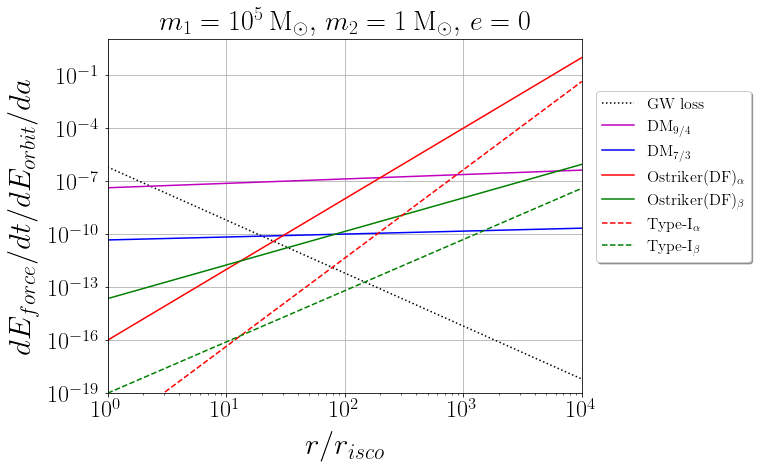

In [83]:
fig= plt.figure(figsize=(8.5, 6.5))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 100)

plt.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0., opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r), 'k:')

## Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
F_df_dm = forces.DynamicalFriction(haloPhaseSpaceDescription=True)
opt_dm = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), F_df_dm}, accuracy=accuracy, verbose=1)
plt.loglog(r/sp_0.r_isco(), np.abs(F_df_dm.dE_dt(sp_dm, r, e=0., opt=opt_dm))/inspiral.Classic.dE_orbit_da(sp_dm, r), 'm')


# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
F_df_dm = forces.DynamicalFriction(haloPhaseSpaceDescription=True)
opt_dm = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), F_df_dm}, accuracy=accuracy, verbose=1)
plt.loglog(r/sp_0.r_isco(), np.abs(F_df_dm.dE_dt(sp_dm, r, e=0., opt=opt_dm))/inspiral.Classic.dE_orbit_da(sp_dm, r), 'b')


l1, = plt.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_alpha, r, e=0., opt=opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r), 'r')
l2, = plt.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_beta, r, e=0., opt=opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_beta, r), 'g')


plt.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_alpha, r, e=0., opt=opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r), 'r--')
plt.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_beta, r, e=0., opt=opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_beta, r), 'g--')





plt.xlabel('$r/r_{isco}$', fontsize = 31, labelpad = 10)
plt.ylabel("$dE_{force}/dt / dE_{orbit}/da$", fontsize = 31, labelpad = 10)
explanatory_lines = [mpl.lines.Line2D([0], [0], color = 'k', linestyle = ':'), 
                     mpl.lines.Line2D([0], [0], color = 'm'),     
                     mpl.lines.Line2D([0], [0], color = 'b'),
                     mpl.lines.Line2D([0], [0], color = 'r'),
                     mpl.lines.Line2D([0], [0], color = 'g'),
                     mpl.lines.Line2D([0], [0], color = 'r', linestyle = '--'),
                     mpl.lines.Line2D([0], [0], color = 'g',  linestyle = '--')]
plt.legend(explanatory_lines, 
                      ['GW loss', 'DM$_{9/4}$', 'DM$_{7/3}$', r'Ostriker(DF)$_{\alpha}$', r'Ostriker(DF)$_{\beta}$' , r'Type-I$_{\alpha}$', r'Type-I$_{\beta}$'
                                         ], 
                                prop = {'size':16}, loc = (1.03, 0.37), shadow = True, facecolor = 'white', fontsize = 72)
    


plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.grid()
plt.xlim(left=1, right=1e4); plt.ylim(bottom=1e-19, top=1e1)
plt.title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e = 0$', fontsize = 28, pad = 10)
plt.savefig("αβ_DM_energyloss.pdf", bbox_inches="tight")
plt.show()

Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.4489s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.9949s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-13


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWar

A termination event occurred.
 -> Evolution took 0.6897s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 1.7921s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.3851s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 1.1720s


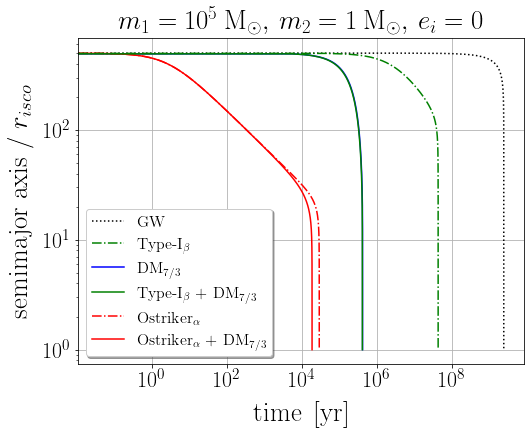

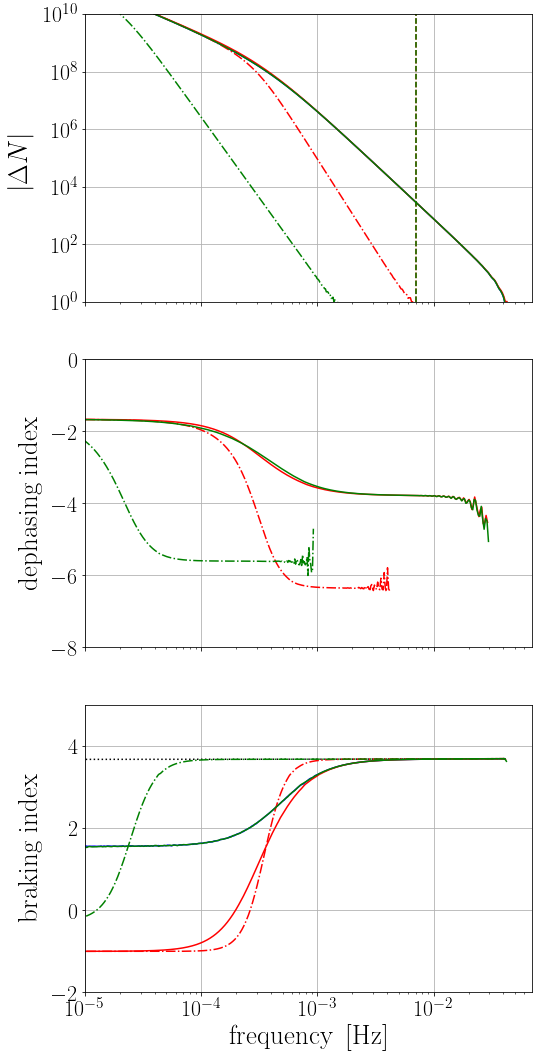

In [138]:
ad_models = [(alphaDisk, "Ostriker", {"label":"$\\alpha$-disk", "color":"red"}), 
            (betaDisk, "Type-I", {"label":"$\\beta$-disk", "color":"green"}),
           ]
explanatory_lines = [mpl.lines.Line2D([0], [0], color ='k', linestyle = ':'),
                          mpl.lines.Line2D([0], [0], color ='g',  linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color ='b'),
                          mpl.lines.Line2D([0], [0], color ='g'),
                          mpl.lines.Line2D([0], [0], color = 'r',  linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color = 'r'),]



explanatory_labels = ["GW", r"Type-I$_{\beta}$", "DM$_{7/3}$", r"Type-I$_{\beta}$ + DM$_{7/3}$", r"Ostriker$_{\alpha}$",
                      r"Ostriker$_{\alpha}$ + DM$_{7/3}$",]


def preparePlots( figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-5, n_b_min=-2.):
    figF.subplots_adjust(hspace=0.2, wspace=0)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 27, labelpad = 9)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 27, labelpad = 9)

    if not axes_a is None:
        for ax in axes_a:
            ax.tick_params(axis = 'y', labelsize = 22)
            ax.tick_params(axis = 'x', labelsize = 22)
            ax.set_xlabel('time $\, \mathrm{[yr]}$', fontsize = 27, labelpad = 9)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 27, labelpad = 9)
        #axes_a[-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_ylabel(r'$|\Delta N|$',    fontsize = 27, labelpad = 9)
    axesF[1,0].set_ylabel(r'dephasing index', fontsize = 27, labelpad = 9)
    axesF[2,0].set_ylabel(r'braking index',   fontsize = 27, labelpad = 9)
    

    for ax in axesF[-1,:]:
        ax.set_xlabel('frequency $\, \mathrm{[Hz]}$', fontsize = 27)

    if axes_a is None and axes_ae is None:
        axesF[1,-1].legend(loc='lower left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_xlim(left=f_min)
    axesF[0,0].set_ylim(bottom=1., top=1e10)
    axesF[1,0].set_ylim(bottom=-8, top=0)
    axesF[2,0].set_ylim(bottom=n_b_min, top=5)

    for ax in axesF.flatten():
        ax.tick_params(axis = 'y', labelsize = 22)
        ax.tick_params(axis = 'x', labelsize = 22)
        ax.grid()


        
        
def compareModels(sp_0, sp_dm, ad_models, a0, e0, fudge_factor=1., a_fin=0.,
                  ax_a=None, ax_e=None, ax_ae=None, ax_h=None, ax_dN2=None, ax_ddN2=None, ax_n=None,
                  acc=1e-10):
    
    opt_0 = inspiral.Classic.EvolutionOptions(accuracy=acc, verbose=1)
    F_df_dm = forces.DynamicalFriction(haloPhaseSpaceDescription=True)
    opt_dm = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), F_df_dm}, accuracy=acc, verbose=1)

    ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=a_fin, opt=opt_0)
    ev_dm = inspiral.Classic.Evolve(sp_dm, a0, e0, a_fin=a_fin, opt=opt_dm)   
    
    l = plot_utils.plotEvolution(sp_0, ev_0, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, label='vacuum', color = 'k', linestyle = ':')

    l = plot_utils.plotEvolution(sp_dm, ev_dm, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, label='spike', color= 'b')
    plot_utils.plotDeltaN(sp_0, ev_0, sp_dm, ev_dm, ax_dN2, color=l.get_c(), label='spike')
    
    for disk, t, kwargs in ad_models:
        if t == "Ostriker":
            opt_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities=True, progradeRotation=False, accuracy=acc, verbose=1)
            opt_dm_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction(), F_df_dm}, 
                                             considerRelativeVelocities=True, progradeRotation=False, accuracy=acc, verbose=1)
        else:
            opt_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities=False, accuracy=acc, verbose=1)
            opt_dm_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction(), F_df_dm}, 
                                             considerRelativeVelocities=False, accuracy=acc, verbose=1)

        sp_b = ms.SystemProp(sp_0.m1, sp_0.m2, halo.ConstHalo(0.), baryonicHalo=disk, D=D)
        sp_dm_b = ms.SystemProp(sp_0.m1, sp_0.m2, sp_dm.halo, baryonicHalo = disk, D=D)
        
        ev_b = inspiral.Classic.Evolve(sp_b, a0, e0, a_fin=a_fin, opt=opt_b)
        ev_dm_b = inspiral.Classic.Evolve(sp_dm_b, a0, e0, a_fin=a_fin, opt=opt_dm_b)
        
        l = plot_utils.plotEvolution(sp_b, ev_b, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, **kwargs, linestyle='-.')
        plot_utils.plotDeltaN(sp_0, ev_0, sp_b, ev_b, ax_dN2, ax_di=ax_ddN2, plotFgw5year=True, **kwargs, linestyle='-.')

        plot_utils.plotEvolution(sp_dm_b, ev_dm_b, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, **kwargs)
        plot_utils.plotDeltaN(sp_0, ev_0, sp_dm_b, ev_dm_b, ax_dN2, ax_di=ax_ddN2, **kwargs)



# An example case
figT, axes_ae = plt.subplots(1, 1, figsize=(8,6))
figF, axes_gw = plt.subplots(3, 1, sharex='col', figsize=(8,18))

# Set initial conditions for orbital evolution
a0 = 500 * sp_0.r_isco()
e0 = 0.

# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm1 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm1 = [(sp_dm1, {"label":"DM spike1", "color":colors["dm"]}) ]



# Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm2 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm2 = [(sp_dm2, {"label":"DM spike2", "color":"m"}) ]
#sps_dm_list = [sps_dm1, sps_dm2]

   

compareModels(sp_0, sps_dm1[0][0], ad_models, a0, e0, acc=1e-13,
                      ax_a=axes_ae,  ax_dN2=axes_gw[0], ax_ddN2=axes_gw[1], ax_n=axes_gw[2])

preparePlots(figF, np.array([ [axes_gw[0]], [axes_gw[1]], [axes_gw[2]] ]), axes_a=[axes_ae])

#axes_ae[1].set_yscale('log')
axes_ae.legend(explanatory_lines, explanatory_labels, 
                prop = {'size':16}, loc = 'lower left', shadow = True,  fontsize = 22) 

axes_ae.set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 0$', fontsize = 27, pad = 10)
#axes_gw[0].set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 0$', fontsize = 27, pad = 10)


figT.savefig("circular_disk_DM73.pdf", bbox_inches="tight")
figF.savefig("circular_gwSignal_disk_DM73.pdf", bbox_inches="tight")
plt.show()

Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.4392s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.9917s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-13


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWar

A termination event occurred.
 -> Evolution took 0.6861s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 1.4261s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 0.4048s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, DynamicalFriction, }, accuracy = 1.0e-13
A termination event occurred.
 -> Evolution took 1.2236s


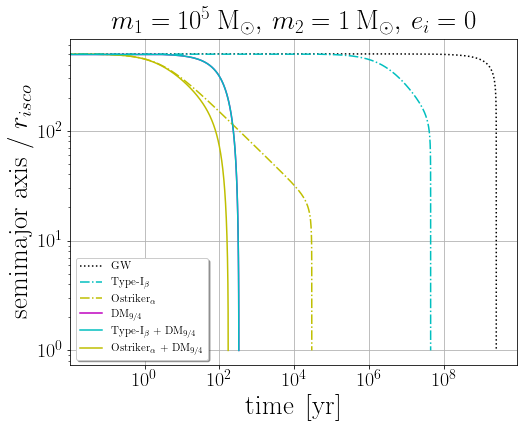

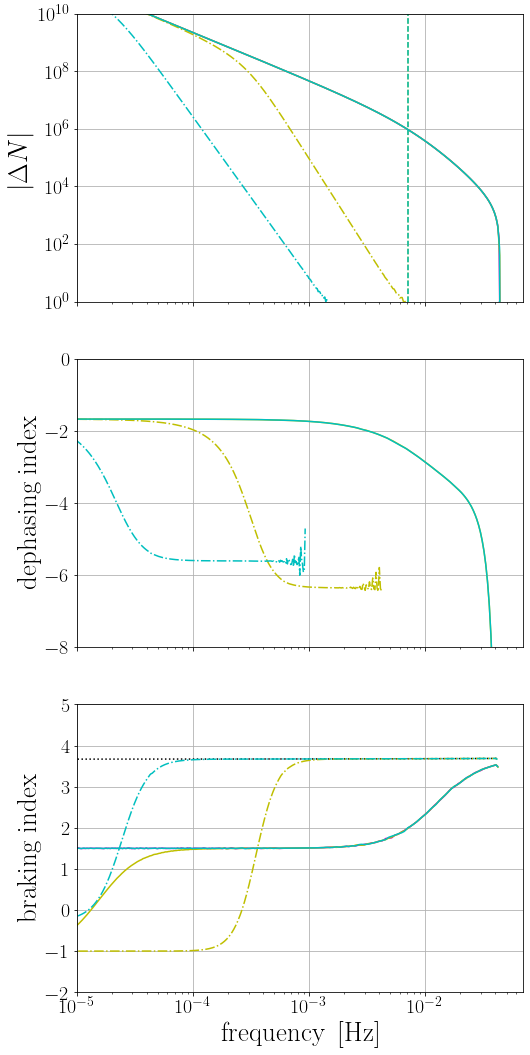

In [147]:
ad_models = [(alphaDisk, "Ostriker", {"label":"$\\alpha$-disk", "color":"y"}), 
            (betaDisk, "Type-I", {"label":"$\\beta$-disk", "color":"c"}),
           ]
explanatory_lines = [mpl.lines.Line2D([0], [0], color ='k', linestyle = ':'),
                          mpl.lines.Line2D([0], [0], color ='c',  linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color = 'y', linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color ='m'),
                          mpl.lines.Line2D([0], [0], color ='c'),
                          mpl.lines.Line2D([0], [0], color = 'y'),
                           
                           ]
explanatory_labels = ["GW", r"Type-I$_{\beta}$", r"Ostriker$_{\alpha}$", "DM$_{9/4}$", r"Type-I$_{\beta}$ + DM$_{9/4}$",
                      r"Ostriker$_{\alpha}$ + DM$_{9/4}$"]






def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-5, n_b_min=-2.):
    figT.subplots_adjust(hspace = 0.2, wspace = 0)
    #figF.subplots_adjust(hspace = 0.1, wspace = 0)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.tick_params(axis = 'y', labelsize = 20)
            ax.tick_params(axis = 'x', labelsize = 20)
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 27)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 27)

    if not axes_a is None:
        for ax in axes_a:
            ax.tick_params(axis = 'y', labelsize = 20)
            ax.tick_params(axis = 'x', labelsize = 20)
            ax.set_xlabel('time $\, \mathrm{[yr]}$', fontsize = 27)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 27)
        #axes_a[-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_ylabel(r'$|\Delta N|$', fontsize = 27)
    axesF[1,0].set_ylabel(r'dephasing index', fontsize = 27)
    axesF[2,0].set_ylabel(r'braking index', fontsize = 27)
    

    for ax in axesF[-1,:]:
        ax.set_xlabel('frequency $\, \mathrm{[Hz]}$', fontsize = 27)

    if axes_a is None and axes_ae is None:
        axesF[1,-1].legend(loc='lower left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_xlim(left=f_min)
    axesF[0,0].set_ylim(bottom=1., top=1e10)
    axesF[1,0].set_ylim(bottom=-8, top=0)
    axesF[2,0].set_ylim(bottom=n_b_min, top=5)

    for ax in axesF.flatten():
        ax.tick_params(axis = 'y', labelsize = 20)
        ax.tick_params(axis = 'x', labelsize = 20)
        ax.grid()


        
        
def compareModels(sp_0, sp_dm, ad_models, a0, e0, fudge_factor=1., a_fin=0.,
                  ax_a=None, ax_e=None, ax_ae=None, ax_h=None, ax_dN2=None, ax_ddN2=None, ax_n=None,
                  acc=1e-10):
    
    opt_0 = inspiral.Classic.EvolutionOptions(accuracy=acc, verbose=1)
    F_df_dm = forces.DynamicalFriction(haloPhaseSpaceDescription=True)
    opt_dm = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), F_df_dm}, accuracy=acc, verbose=1)

    ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=a_fin, opt=opt_0)
    ev_dm = inspiral.Classic.Evolve(sp_dm, a0, e0, a_fin=a_fin, opt=opt_dm)   
    
    l = plot_utils.plotEvolution(sp_0, ev_0, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, label='vacuum', color = 'k', linestyle = ':')

    l = plot_utils.plotEvolution(sp_dm, ev_dm, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, label='spike', color= 'm')
    plot_utils.plotDeltaN(sp_0, ev_0, sp_dm, ev_dm, ax_dN2, color=l.get_c(), label='spike')
    
    for disk, t, kwargs in ad_models:
        if t == "Ostriker":
            opt_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities=True, progradeRotation=False, accuracy=acc, verbose=1)
            opt_dm_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasDynamicalFriction(), F_df_dm}, 
                                             considerRelativeVelocities=True, progradeRotation=False, accuracy=acc, verbose=1)
        else:
            opt_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities=False, accuracy=acc, verbose=1)
            opt_dm_b = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction(), F_df_dm}, 
                                             considerRelativeVelocities=False, accuracy=acc, verbose=1)

        sp_b = ms.SystemProp(sp_0.m1, sp_0.m2, halo.ConstHalo(0.), baryonicHalo=disk, D=D)
        sp_dm_b = ms.SystemProp(sp_0.m1, sp_0.m2, sp_dm.halo, baryonicHalo = disk, D=D)
        
        ev_b = inspiral.Classic.Evolve(sp_b, a0, e0, a_fin=a_fin, opt=opt_b)
        ev_dm_b = inspiral.Classic.Evolve(sp_dm_b, a0, e0, a_fin=a_fin, opt=opt_dm_b)
        
        l = plot_utils.plotEvolution(sp_b, ev_b, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, **kwargs, linestyle='-.')
        plot_utils.plotDeltaN(sp_0, ev_0, sp_b, ev_b, ax_dN2, ax_di=ax_ddN2, plotFgw5year=True, **kwargs, linestyle='-.')

        plot_utils.plotEvolution(sp_dm_b, ev_dm_b, ax_a=ax_a, ax_ae=ax_ae, ax_n=ax_n, **kwargs)
        plot_utils.plotDeltaN(sp_0, ev_0, sp_dm_b, ev_dm_b, ax_dN2, ax_di=ax_ddN2, **kwargs)



# An example case
figT, axes_ae = plt.subplots(1, 1, figsize=(8,6))
figF, axes_gw = plt.subplots(3, 1, sharex='col', figsize=(8,18))

# Set initial conditions for orbital evolution
a0 = 500 * sp_0.r_isco()
e0 = 0.


# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm1 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm1 = [(sp_dm1, {"label":"DM spike1", "color":colors["dm"]}) ]



# Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm2 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm2 = [(sp_dm2, {"label":"DM spike2", "color":"m"}) ]
#sps_dm_list = [sps_dm1, sps_dm2]

    

compareModels(sp_0, sps_dm2[0][0], ad_models, a0, e0, acc=1e-13,
                      ax_a=axes_ae,  ax_dN2=axes_gw[0], ax_ddN2=axes_gw[1], ax_n=axes_gw[2])

preparePlots(figF, np.array([ [axes_gw[0]], [axes_gw[1]], [axes_gw[2]] ]), axes_a=[axes_ae])

#axes_ae[1].set_yscale('log')
axes_ae.legend(explanatory_lines, explanatory_labels, 
                prop = {'size':11}, loc = 'lower left', shadow = True,  fontsize = 22) 


axes_ae.set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 0$', fontsize = 27, pad = 10)
#axes_gw[0].set_title(r'$m_{1} = 10^{5} \: \mathrm{M_{\odot}},\, m_{2} = 1 \: \mathrm{M_{\odot}},\, e_{i} = 0$', fontsize = 27, pad = 10)


figT.savefig("circular_disk_DM94.pdf", bbox_inches="tight")
figF.savefig("circular_gwSignal_disk_DM94.pdf", bbox_inches="tight")
plt.show()

Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 12.8743s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 19.7044s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, GasDynamicalFriction, }, accuracy = 1.0e-12


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 13.0081s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 31.1113s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 5.0614s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 23.7571s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 5.4295s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 10.8176s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-11


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 18.1566s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, GasDynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 21.5490s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {GasInteraction, GWLoss, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 4.4175s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.01  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, GasInteraction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 13.3527s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 5.5131s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 13.5142s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-11


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 24.3687s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {DynamicalFriction, GWLoss, GasDynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 34.6543s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 4.3252s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative Forces emplyed {DynamicalFriction, GasInteraction, GWLoss, }, accuracy = 1.0e-11
A termination event occurred.
 -> Evolution took 15.3688s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


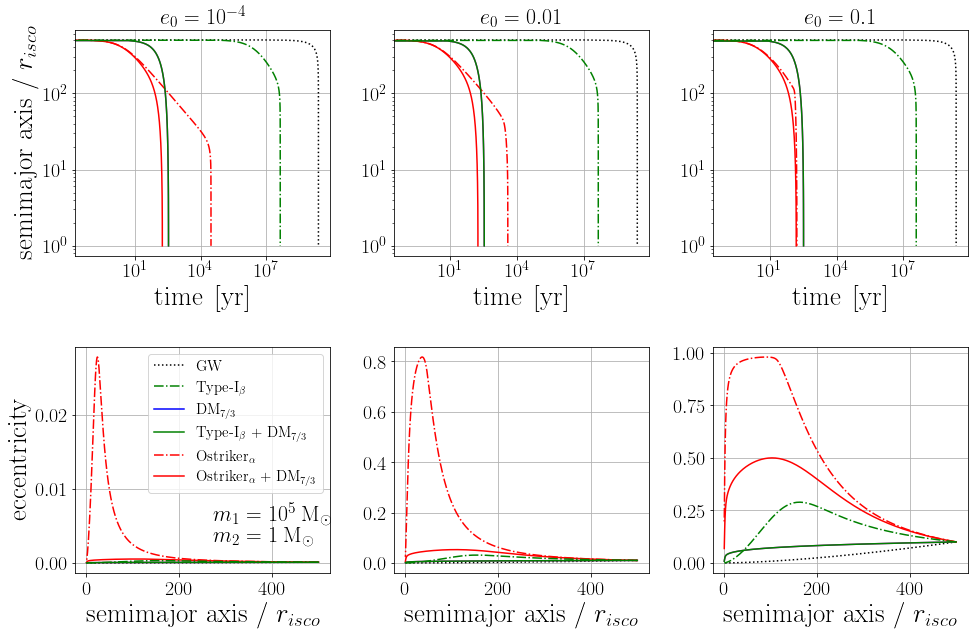

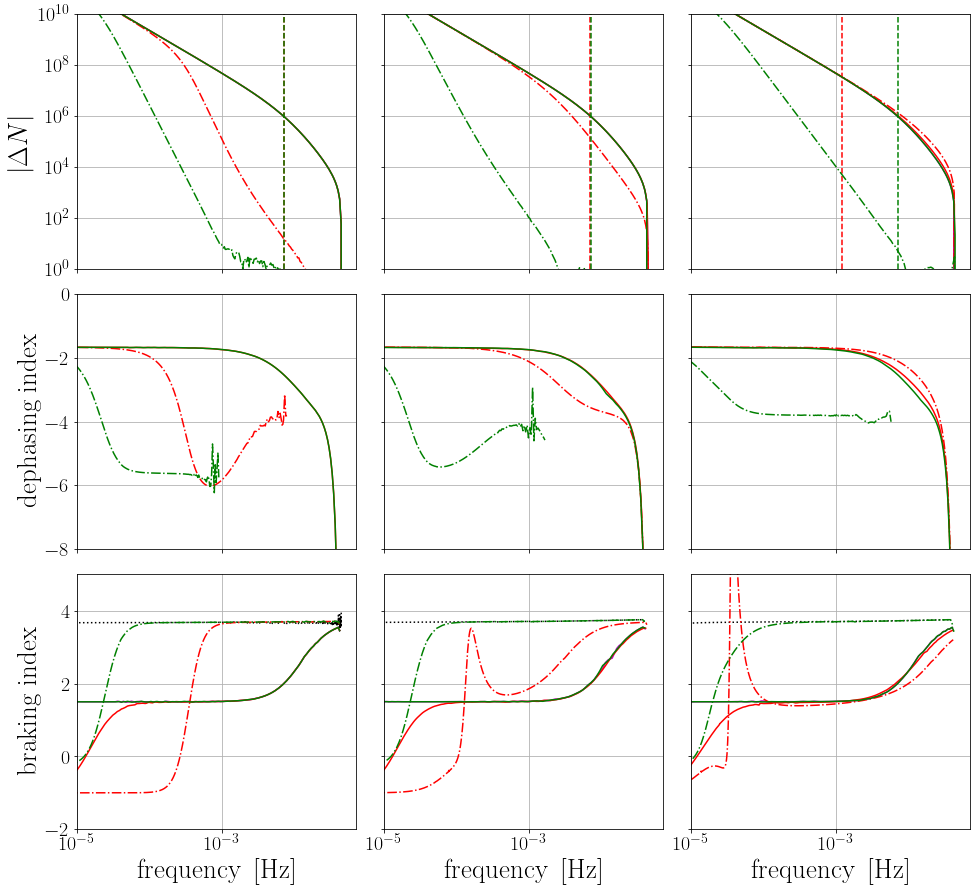

In [155]:
ad_models = [(alphaDisk, "Ostriker", {"label":"$\\alpha$-disk", "color":"red"}), 
            (betaDisk, "Type-I", {"label":"$\\beta$-disk", "color":"green"}),
           ]



explanatory_lines = [mpl.lines.Line2D([0], [0], color ='k', linestyle = ':'),
                          mpl.lines.Line2D([0], [0], color ='g',  linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color ='b'),
                          mpl.lines.Line2D([0], [0], color ='g'),
                          mpl.lines.Line2D([0], [0], color = 'r', linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color = 'r'),]



explanatory_labels = ["GW", r"Type-I$_{\beta}$", "DM$_{7/3}$", r"Type-I$_{\beta}$ + DM$_{7/3}$", r"Ostriker$_{\alpha}$",
                      r"Ostriker$_{\alpha}$ + DM$_{7/3}$",]







def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-5, n_b_min=-2.):
    figT.subplots_adjust(hspace = 0.4, wspace = 0.25)
    figF.subplots_adjust(hspace = 0.1, wspace = 0.1)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.tick_params(axis = 'y', labelsize = 20)
            ax.tick_params(axis = 'x', labelsize = 20)
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 27)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 27)

    if not axes_a is None:
        for ax in axes_a:
            ax.tick_params(axis = 'y', labelsize = 20)
            ax.tick_params(axis = 'x', labelsize = 20)
            ax.set_xlabel('time $\, \mathrm{[yr]}$', fontsize = 27)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 27)
        #axes_a[-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_ylabel(r'$|\Delta N|$', fontsize = 27)
    axesF[1,0].set_ylabel(r'dephasing index', fontsize = 27)
    axesF[2,0].set_ylabel(r'braking index', fontsize = 27)
    

    for ax in axesF[-1,:]:
        ax.set_xlabel('frequency $\, \mathrm{[Hz]}$', fontsize = 27)

    if axes_a is None and axes_ae is None:
        axesF[1,-1].legend(loc='lower left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_xlim(left=f_min)
    axesF[0,0].set_ylim(bottom=1., top=1e10)
    axesF[1,0].set_ylim(bottom=-8, top=0)
    axesF[2,0].set_ylim(bottom=n_b_min, top=5)

    for ax in axesF.flatten():
        ax.tick_params(axis = 'y', labelsize = 20)
        ax.tick_params(axis = 'x', labelsize = 20)
        ax.grid()



# Look at different initial eccentricities
figT, axesT = plt.subplots(2, 3, figsize=(16, 10))
figF, axesF = plt.subplots(3, 3, figsize=(16, 15), sharex='all', sharey='row')
# Set initial conditions for orbital evolution
a0 = 500 * sp_0.r_isco()

e0 = 1e-4
axesT[0,0].set_title(r"$e_0=10^{-4}$", fontsize=22);# axesF[0,0].set_title(r"$e_0=10^{-4}$")
compareModels(sp_0, sps_dm[0][0], ad_models, a0, e0, acc=1e-12,
              ax_a=axesT[0,0], ax_ae=axesT[1,0], ax_dN2=axesF[0,0], ax_ddN2=axesF[1,0], ax_n=axesF[2,0])
e0 = 0.01
axesT[0,1].set_title(r"$e_0=0.01$", fontsize=22);# axesF[0,1].set_title(r"$e_0=0.1$")
compareModels(sp_0, sps_dm[0][0], ad_models, a0, e0, acc=1e-11,
              ax_a = axesT[0,1], ax_ae = axesT[1,1], ax_dN2=axesF[0,1], ax_ddN2=axesF[1,1], ax_n=axesF[2,1])
e0 = 0.1
axesT[0,2].set_title(r"$e_0=0.1$", fontsize = 22); #axesF[0,2].set_title(r"$e_0=0.6$")
compareModels(sp_0, sps_dm[0][0], ad_models, a0, e0, acc = 1e-11,
              ax_a = axesT[0,2], ax_ae = axesT[1,2], ax_dN2=axesF[0,2], ax_ddN2=axesF[1,2], ax_n=axesF[2,2])

preparePlots( figF, axesF, axes_ae = axesT[1,:], axes_a = axesT[0,:])
#figT.subplots_adjust(wspace = 0)
axesT[1,0].legend(explanatory_lines, explanatory_labels, loc='upper right', prop = {'size':15}, fontsize=18) 
axesT[1,0].text(400, 6.5e-3, "$m_{1} = 10^{5} \: \mathrm{M_{\odot}}$", size = 22,
       ha="center", va="center")
axesT[1,0].text(380, 3.5e-3, r"$m_{2} = 1 \: \mathrm{M_{\odot}}$", size = 22,
         ha="center", va="center")
axesT[0,0].set_yscale('log')
figT.savefig("evolution_e0.pdf", bbox_inches="tight")
figF.savefig("gwSignal_e0.pdf", bbox_inches="tight")

In [ ]:
ad_models = [(alphaDisk, "Ostriker", {"label":"$\\alpha$-disk", "color":"y"}), 
            (betaDisk, "Type-I", {"label":"$\\beta$-disk", "color":"c"}),
           ]
explanatory_lines = [mpl.lines.Line2D([0], [0], color ='k', linestyle = ':'),
                          mpl.lines.Line2D([0], [0], color ='y',  linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color = 'c', linestyle = '-.'),
                          mpl.lines.Line2D([0], [0], color ='m'),
                          mpl.lines.Line2D([0], [0], color ='y'),
                          mpl.lines.Line2D([0], [0], color = 'c'),]


explanatory_labels = ["GW", r"Type-I$_{\beta}$", r"Ostriker$_{\alpha}$", "DM$_{9/4}$", r"Type-I$_{\beta}$ + DM$_{9/4}$",
                      r"Ostriker$_{\alpha}$ + DM$_{9/4}$"]


# Look at different initial eccentricities
figT, axesT = plt.subplots(2, 3, figsize = (16, 10))
figF, axesF = plt.subplots(3, 3, figsize = (16, 15), sharex = 'all', sharey = 'row')


# Set initial conditions for orbital evolution
a0 = 500 * sp_0.r_isco()
e0 = 1e-4

# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * 5**2 * c.solar_mass_to_pc  # in 1/pc^2 
g_spike = 7./3.
sp_dm1 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm1 = [(sp_dm1, {"label":"DM spike1", "color":colors["dm"]}) ]



# Dark matter spike with alpha=9/4 for Primordial black holes case
rho6 = ρ_halo(m1)   # in 1/pc^2 
g_spike = 9./4.
sp_dm2 = makeDynamicSpike(ms.SystemProp(m1, m2, halo.Spike.FromRho6(rho6, m1, g_spike), D))#, label) for alpha,label in alphas]
sps_dm2 = [(sp_dm2, {"label":"DM spike2", "color":"m"}) ]
#sps_dm_list = [sps_dm1, sps_dm2]



axesT[0,0].set_title(r"$e_0=10^{-4}$", fontsize = 22);# axesF[0,0].set_title(r"$e_0=10^{-4}$")
compareModels(sp_0, sps_dm2[0][0], ad_models, a0, e0, acc = 1e-12,
              ax_a = axesT[0,0], ax_ae = axesT[1,0], ax_dN2 = axesF[0,0], ax_ddN2 = axesF[1,0], ax_n = axesF[2,0])
e0 = 0.01
axesT[0,1].set_title(r"$e_0=0.01$", fontsize = 22);# axesF[0,1].set_title(r"$e_0=0.1$")
compareModels(sp_0, sps_dm2[0][0], ad_models, a0, e0, acc=1e-11,
              ax_a = axesT[0,1], ax_ae = axesT[1,1], ax_dN2=axesF[0,1], ax_ddN2=axesF[1,1], ax_n=axesF[2,1])
e0 = 0.1
axesT[0,2].set_title(r"$e_0=0.1$", fontsize=22); #axesF[0,2].set_title(r"$e_0=0.6$")
compareModels(sp_0, sps_dm2[0][0], ad_models, a0, e0, acc=1e-11,
              ax_a=axesT[0,2], ax_ae=axesT[1,2], ax_dN2=axesF[0,2], ax_ddN2=axesF[1,2], ax_n=axesF[2,2])

preparePlots( figF, axesF, axes_ae = axesT[1,:], axes_a=axesT[0,:])
axesT[1,0].legend(explanatory_lines, explanatory_labels, loc='upper right', prop = {'size':15}, fontsize=18) 
axesT[1,0].text(400, 6.5e-3, "$m_{1} = 10^{5} \: \mathrm{M_{\odot}}$", size = 22,
       ha="center", va="center")
axesT[1,0].text(380, 3.5e-3, r"$m_{2} = 1 \: \mathrm{M_{\odot}}$", size = 22,
         ha="center", va="center")
axesT[0,0].set_yscale('log')
figT.savefig("evolution_e0_DM.pdf", bbox_inches="tight")
figF.savefig("gwSignal_e0_DM.pdf", bbox_inches="tight")

Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 12.9221s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 20.0296s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-12


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 12.4506s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, DynamicalFriction, }, accuracy = 1.0e-12
A termination event occurred.
 -> Evolution took 29.9023s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
